In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import pickle


In [2]:
def plot(values, name, ax, color=None):
    arr = np.vstack(values)
    length = arr.shape[1]
    mean = arr.mean(axis=0)
    std = arr.std(axis=0)
    if color:
        ax.plot(arr.mean(axis=0), label=name, color=color)
        ax.fill_between(np.arange(length), (mean - std), (mean + std), alpha=0.2, color=color)
    else:
        ax.plot(arr.mean(axis=0), label=name)
        ax.fill_between(np.arange(length), (mean - std),
                        (mean + std), alpha=0.2)


In [3]:
def load_pickle_file(name, m, n, d):
    with open(f'..{os.sep}..{os.sep}results{os.sep}nnz_vectors{os.sep}m-{m}-n-{n}-d-{d}-{name}.pickle', 'rb') as f:
        return pickle.load(f)


/tmp/ipykernel_929385/2538463336.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(['-1', '0', '5', '10', '15'], fontsize=12)
/tmp/ipykernel_929385/2538463336.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(['1e0', '1e1', '1e2', '1e3'], fontsize=14)


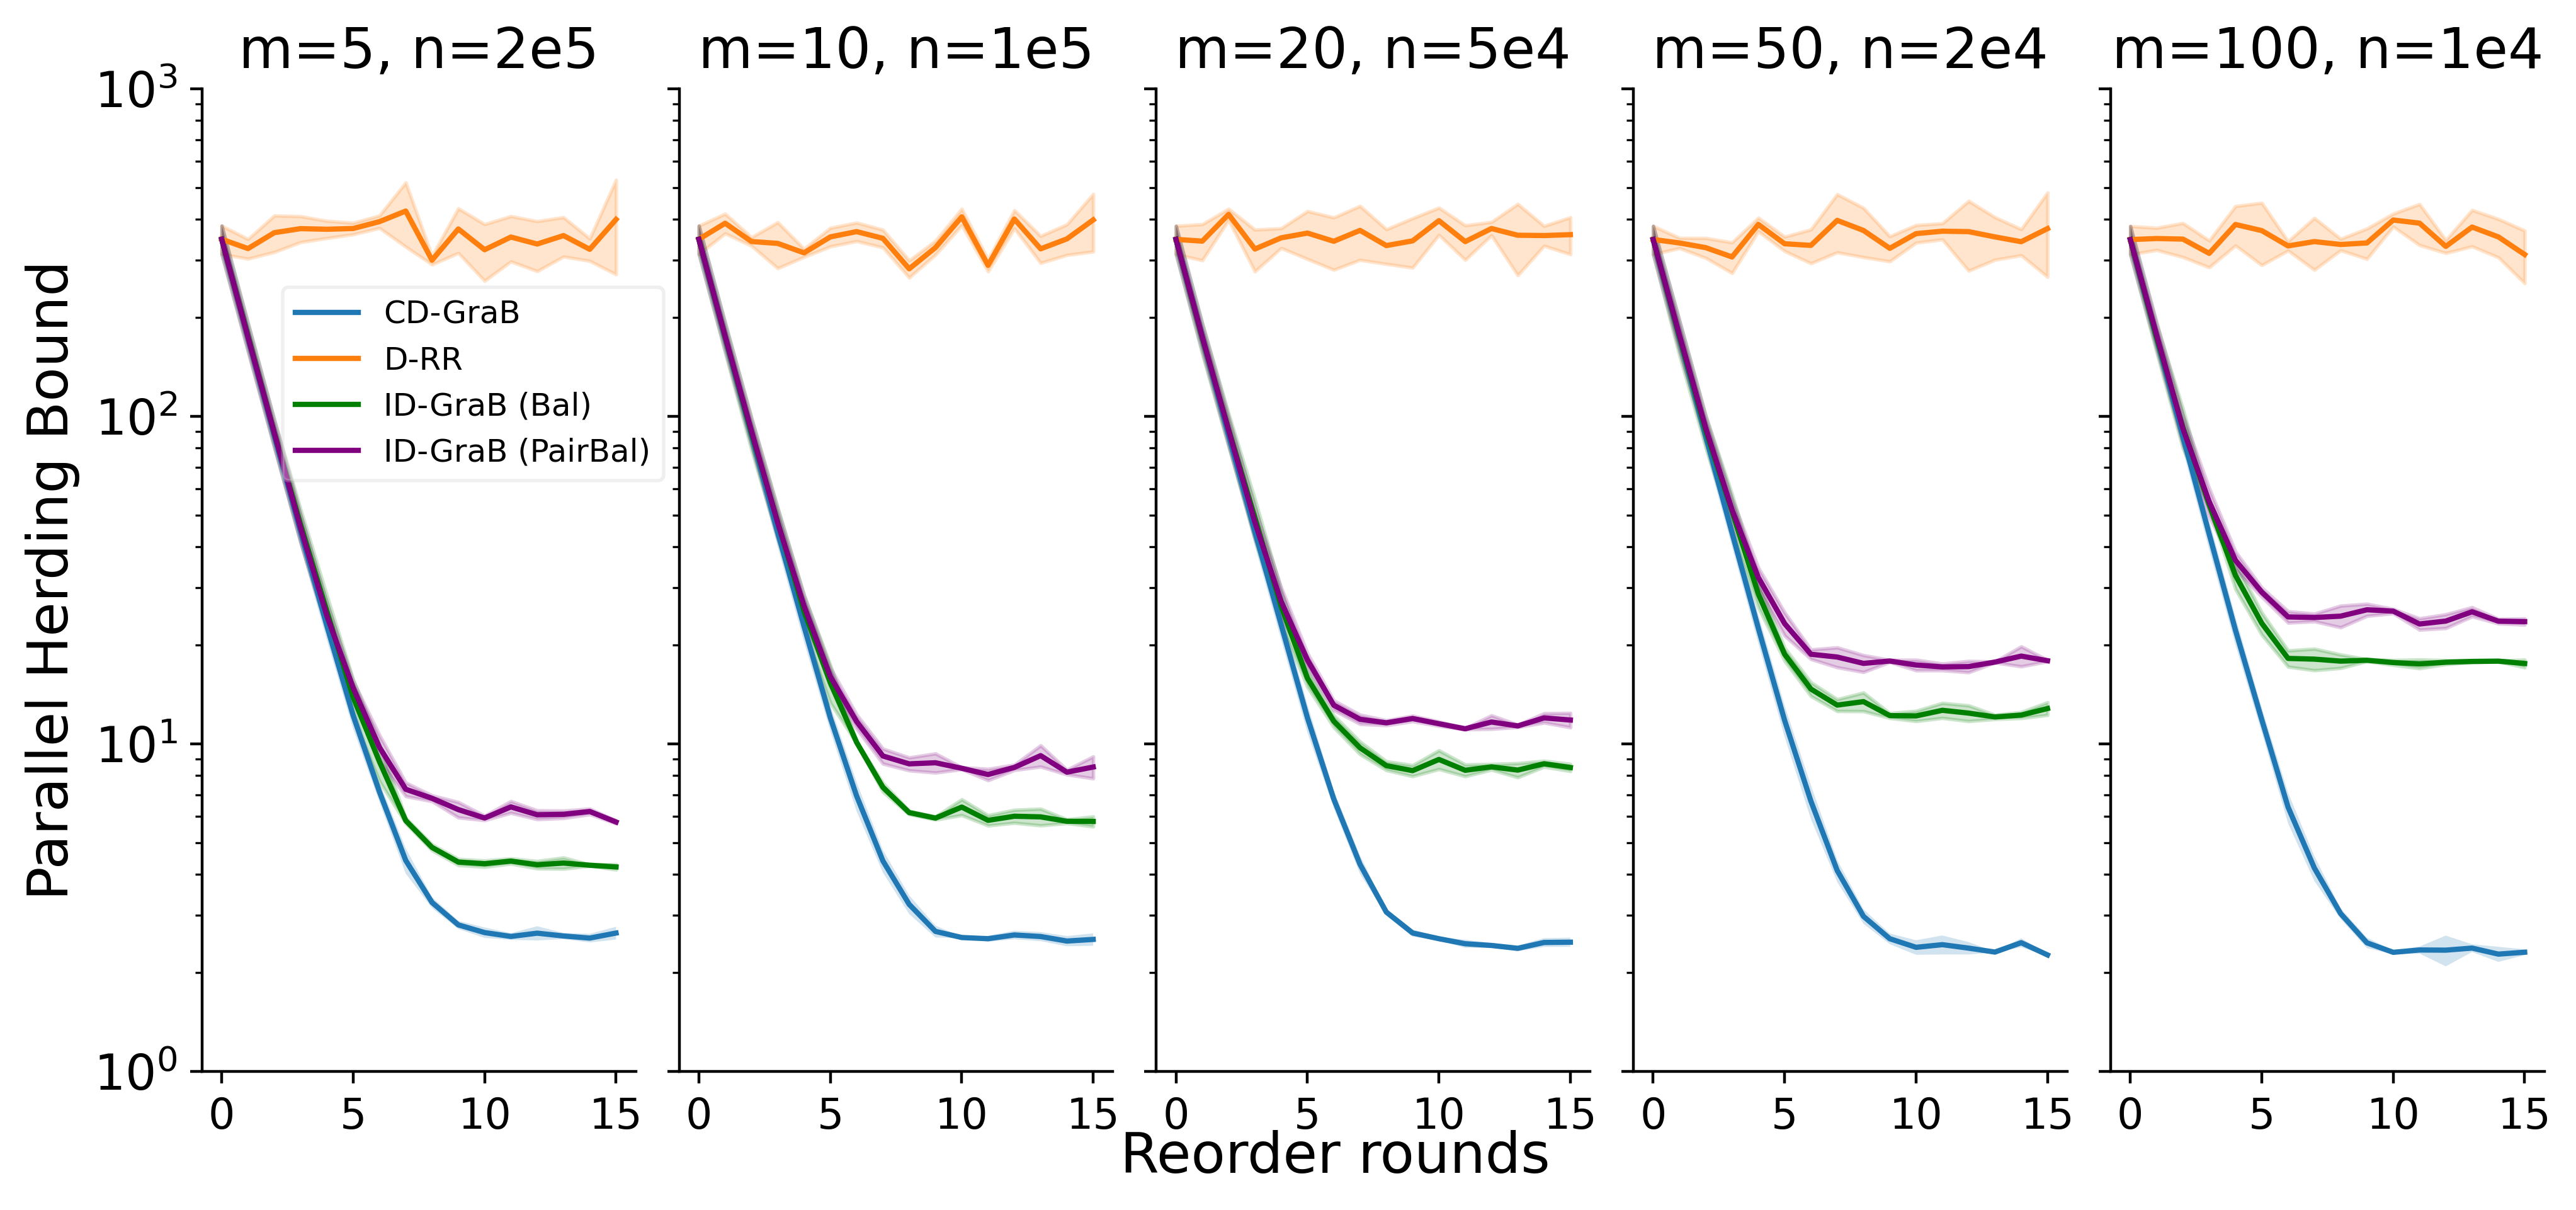

In [82]:
ms = [int(2e5), int(1e5), int(5e4), int(2e4), int(1e4)]
ns = [5, 10, 20, 50, 100]
ms_to_show = ['2e5', '1e5', '5e4', '2e4', '1e4']

d = 16

fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(12, 5), dpi=400, gridspec_kw=dict(wspace=0.1, hspace=0.1, bottom=0.1), sharex=True, sharey=True)

for i in range(5):
    m, n = ms[i], ns[i]
    independent_herding_values = load_pickle_file('independent-balance', m, n, d)
    order_server_herding_values = load_pickle_file('online-pb', m, n, d)
    independent_pair_balance_herding_values = load_pickle_file('independent-pb', m, n, d)
    random_herding_values = load_pickle_file('random', m, n, d)

    plot(order_server_herding_values, 'CD-GraB', axes[i])
    plot(random_herding_values, 'D-RR', axes[i],  color='#ff7f0e')
    plot(independent_herding_values, 'ID-GraB (Bal)', axes[i], color='green')
    plot(independent_pair_balance_herding_values, 'ID-GraB (PairBal)', axes[i],  color='purple')

    axes[i].set_title(f"m={n}, n={ms_to_show[i]}", fontsize=16)
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].set_xticklabels(['-1', '0', '5', '10', '15'], fontsize=12)

axes[0].set_ylim(1, 1000)
axes[0].set_yticklabels(['1e0', '1e1', '1e2', '1e3'], fontsize=14)
axes[0].set_yscale('log')
axes[0].set_ylabel("Parallel Herding Bound", fontsize=16)
axes[0].legend(fontsize=9, loc='right', framealpha=0.3, bbox_to_anchor=(1.1, 0.7))
fig.supxlabel('Reorder rounds', fontsize=16)
fig.savefig(f'..{os.sep}..{os.sep}graph{os.sep}random_simulation{os.sep}random_simulation_complete.png')
fig.savefig(f'..{os.sep}..{os.sep}graph{os.sep}random_simulation{os.sep}random_simulation_complete.pdf',
            format="pdf", bbox_inches="tight")
